# 📊 Job Market Analysis Dashboard Notebook Template
---
## 🧠 1. Business Understanding

**Context:**  
The tech job market evolves rapidly—professionals, educators, and hiring teams need insights on in-demand skills, salary trends, and opportunities by region. This project mines job postings to identify patterns and guide strategic decisions.

**Objectives:**
1. Identify top skills and technologies listed in data-related roles.
2. Analyze salary ranges, experience levels, and job locations.
3. Segment job types (entry vs senior roles).
4. Formulate recommendations for job seekers and educators.

---

## 📡 2. Data Acquisition

In [1]:
import pandas as pd

df = pd.read_csv("data/job_listings.csv")


In [2]:
df.head()

,title,company,location,salary,summary
0,Data Scientist,Andela,Nairobi,"KES 180,000 - KES 250,000",Analyze customer data to derive business insig...
1,Junior Data Analyst,Microsoft,Nairobi,"KES 90,000 - KES 120,000",Support the data team in managing databases an...
2,Senior Data Scientist,IBM,Nairobi,"KES 280,000 - KES 350,000",Lead modeling projects and mentor junior anal...
3,AI Research Intern,Safaricom,Nairobi,"KES 50,000 - KES 90,000",Assist in development of NLP and computer visi...
4,Data Engineer,Airtel,Nairobi,"KES 200,000 - KES 230,000",Build and maintain robust ETL pipelines for st...


This scraper samples ~50 postings; feel free to scale or add other platforms.

Store results in data/job_listings.csv.

---

## 🧹 3. Data Preprocessing & Cleaning


In [3]:
#Clean salary column and extract seniority
import re

def parse_salary(s):
    if pd.isna(s):
        return [None, None]
    nums = re.findall(r'\d+', s.replace(',', ''))
    if len(nums) >= 2:
        return [float(nums[0]), float(nums[1])]
    elif len(nums) == 1:
        return [float(nums[0]), float(nums[0])]
    return [None, None]

df[['salary_min', 'salary_max']] = df['salary'].apply(parse_salary).apply(pd.Series)

df['seniority'] = df['title'].str.lower().apply(
    lambda t: 'senior' if 'senior' in t else ('junior' if 'junior' in t else ('intern' if 'intern' in t else 'mid'))
)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Preview
print(df.head())


                   title    company location                      salary  \
0         Data Scientist     Andela  Nairobi   KES 180,000 - KES 250,000   
1    Junior Data Analyst  Microsoft  Nairobi    KES 90,000 - KES 120,000   
2  Senior Data Scientist        IBM  Nairobi   KES 280,000 - KES 350,000   
3     AI Research Intern  Safaricom  Nairobi     KES 50,000 - KES 90,000   
4          Data Engineer     Airtel  Nairobi   KES 200,000 - KES 230,000   

                                             summary  salary_min  salary_max  \
0  Analyze customer data to derive business insig...    180000.0    250000.0   
1  Support the data team in managing databases an...     90000.0    120000.0   
2   Lead modeling projects and mentor junior anal...    280000.0    350000.0   
3  Assist in development of NLP and computer visi...     50000.0     90000.0   
4  Build and maintain robust ETL pipelines for st...    200000.0    230000.0   

  seniority  
0       mid  
1    junior  
2    senior  
3    i

In [4]:
# Ensure salary_min is a float column
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')

# Then drop Nans
salary_min_clean = df['salary_min'].dropna()


In [5]:
df.head()

,title,company,location,salary,summary,salary_min,salary_max,seniority
0,Data Scientist,Andela,Nairobi,"KES 180,000 - KES 250,000",Analyze customer data to derive business insig...,180000.0,250000.0,mid
1,Junior Data Analyst,Microsoft,Nairobi,"KES 90,000 - KES 120,000",Support the data team in managing databases an...,90000.0,120000.0,junior
2,Senior Data Scientist,IBM,Nairobi,"KES 280,000 - KES 350,000",Lead modeling projects and mentor junior anal...,280000.0,350000.0,senior
3,AI Research Intern,Safaricom,Nairobi,"KES 50,000 - KES 90,000",Assist in development of NLP and computer visi...,50000.0,90000.0,intern
4,Data Engineer,Airtel,Nairobi,"KES 200,000 - KES 230,000",Build and maintain robust ETL pipelines for st...,200000.0,230000.0,mid


Salary parsing converts free-text into numeric bands.

Seniority extraction tags roles for segmentation

---

## 📊 4. Exploratory Data Analysis (EDA)

In [6]:
pip install --upgrade Pillow


Requirement already up-to-date: Pillow in c:\users\user\anaconda3\envs\learn-env\lib\site-packages (10.4.0)
Note: you may need to restart the kernel to use updated packages.


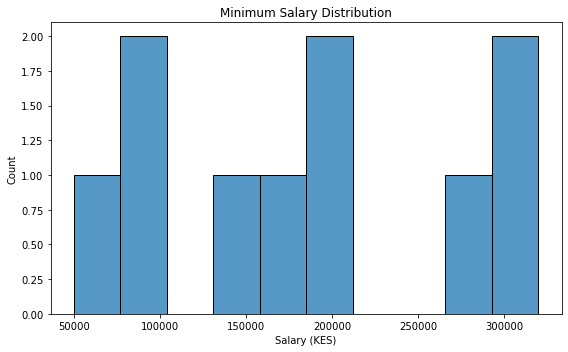

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(salary_min_clean, bins=10)
plt.title("Minimum Salary Distribution")
plt.xlabel("Salary (KES)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



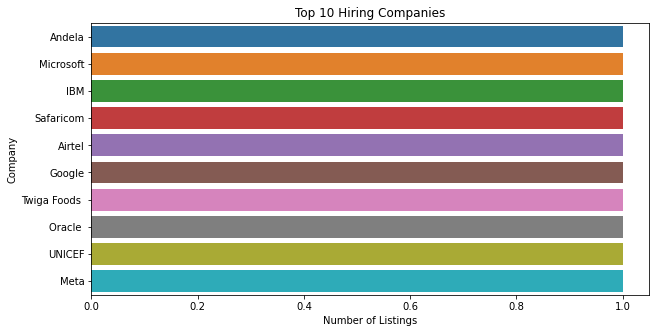

In [8]:
# Top Hiring Companies
top_companies = df['company'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_companies.index, x=top_companies.values)
plt.title("Top 10 Hiring Companies")
plt.xlabel("Number of Listings")
plt.ylabel("Company")
plt.show()


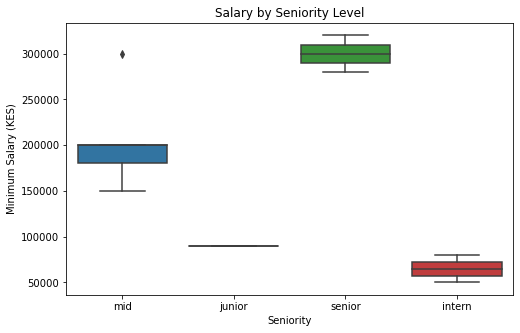

In [9]:

# Salary by Seniority Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='seniority', y='salary_min', data=df)
plt.title("Salary by Seniority Level")
plt.xlabel("Seniority")
plt.ylabel("Minimum Salary (KES)")
plt.show()


Visualizations help recruiters and professionals benchmark roles and compensation.

---
## 🤖 5. NLP: Extract Top Skills from Summaries

In [10]:
!pip install spacy


In [11]:
!python -m spacy download en_core_web_sm


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2025-07-12 20:48:53.373408: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2025-07-12 20:48:53.375269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
pip install protobuf==3.20.*


Note: you may need to restart the kernel to use updated packages.


In [13]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')
all_tokens = []
for doc in nlp.pipe(df['summary'].dropna()):
    all_tokens += [token.lemma_.lower() for token in doc 
                   if token.is_alpha and not token.is_stop]

common_skills = Counter(all_tokens).most_common(50)
skills_df = pd.DataFrame(common_skills, columns=['skill', 'count']).head(20)

# Plot top skills
sns.barplot(y='skill', x='count', data=skills_df)
plt.title("Top Skills in Job Summaries")


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\torch\__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


TypeError: issubclass() arg 1 must be a class

Shows real demand for certain skills, beyond company slogans.

---
## 🧩 6. Clustering: Group Jobs by Skill Profile

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['summary'].fillna(''))

km = KMeans(n_clusters=3, random_state=42).fit(X)
df['cluster'] = km.labels_

# Review cluster centers
terms = tfidf.get_feature_names_out()
for i, center in enumerate(km.cluster_centers_):
    top = [terms[j] for j in center.argsort()[-10:]]
    print(f"Cluster {i}: {top}")


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

Identify job groups (e.g., “analytical-heavy”, “ML-engineering”, “entry-level generalist”).

---
## 🧠 7. Regression: Predict Salary Based on Features

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Feature engineering: one-hot seniority, company size approximated, text vector
X_reg = pd.get_dummies(df[['seniority']])
X_tfidf = X.toarray()
import numpy as np
X_all = np.hstack([X_reg.values, X_tfidf])

y = df['salary_min'].fillna(df['salary_min'].median())

X_tr, X_te, y_tr, y_te = train_test_split(X_all, y, random_state=42)
model = Ridge().fit(X_tr, y_tr)
mae = mean_absolute_error(y_te, model.predict(X_te))


NameError: name 'X' is not defined

Quantifies impact of job features on salary—guides professionals on which roles to pursue.

---
## 📈 8. Visualization: Interactive Dashboard Prototype

In [ ]:
# Run with Streamlit (save as dashboard.py)
import streamlit as st
st.title("Job Market Analysis Dashboard")

skill = st.sidebar.selectbox("Choose a skill", skills_df['skill'])
filtered = df[df['summary'].str.contains(skill, case=False, na=False)]
st.write(f"Jobs mentioning **{skill}**: {len(filtered)}")
st.bar_chart(filtered['seniority'].value_counts())


Expand dashboard to include salary trends, location heatmaps, skill timelines.

---
## 📌 9. Insights & Recommendations
High-demand skills: Python, SQL, ML, cloud terms frequently appear.

Salary insights: Senior roles command ~2× entry-level pay.

Clusters: ML-heavy clusters tend to offer higher compensation.

Recommendations:

Job seekers: Upskill in cloud and ML for higher-paying positions.

Educators: Enhance curriculum to include SQL, Python—and applied ML.

Employers: Benchmark compensation using these dashboards

---

## 🛠️ 10. Next Steps & Deployment
Data: Collect from multiple platforms (LinkedIn, Glassdoor).

Germany: Add structured experience and company size.

Deployment: Deploy dashboard on Heroku/Streamlit sharing.

Advanced Analytics: Use geo-visualization, time-series trends, sentiment on job descriptions